<a href="https://colab.research.google.com/github/cisnux-seed/machine-learning-course/blob/main/regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [9]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [10]:
import pandas as pd

data = pd.read_csv('/content/drive/MyDrive/sample_data/EconomiesOfScale.csv')
data.head()

,Number of Units,Manufacturing Cost
0,1.000000,95.066056
1,1.185994,96.531750
2,1.191499,73.661311
3,1.204771,95.566843
4,1.298773,98.777013


In [11]:
data.describe()

,Number of Units,Manufacturing Cost
count,1000.000000,1000.000000
mean,4.472799,40.052999
std,1.336241,10.595322
min,1.000000,20.000000
25%,3.594214,32.912036
50%,4.435958,38.345781
75%,5.324780,44.531822
max,10.000000,100.000000


In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 2 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Number of Units     1000 non-null   float64
 1   Manufacturing Cost  1000 non-null   float64
dtypes: float64(2)
memory usage: 15.8 KB


In [6]:
import seaborn as sns
import matplotlib.pyplot as plt

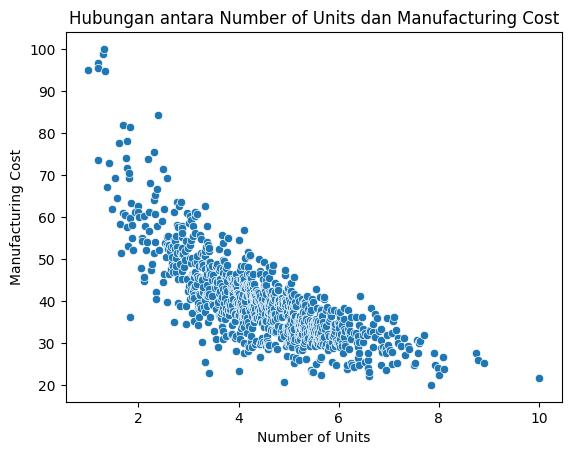

In [13]:
# Membuat scatter plot
sns.scatterplot(data=data, x="Number of Units", y="Manufacturing Cost")
# Memberikan judul dan label sumbu
plt.title("Hubungan antara Number of Units dan Manufacturing Cost")
plt.xlabel ("Number of Units")
plt.ylabel("Manufacturing Cost")
# Menampilkan plot
plt.show()

In [14]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error

In [15]:
# Kolom label (variabel dependen)
x = data["Number of Units"]
# Kolom target (variabel independen)
y = data[ "Manufacturing Cost"]

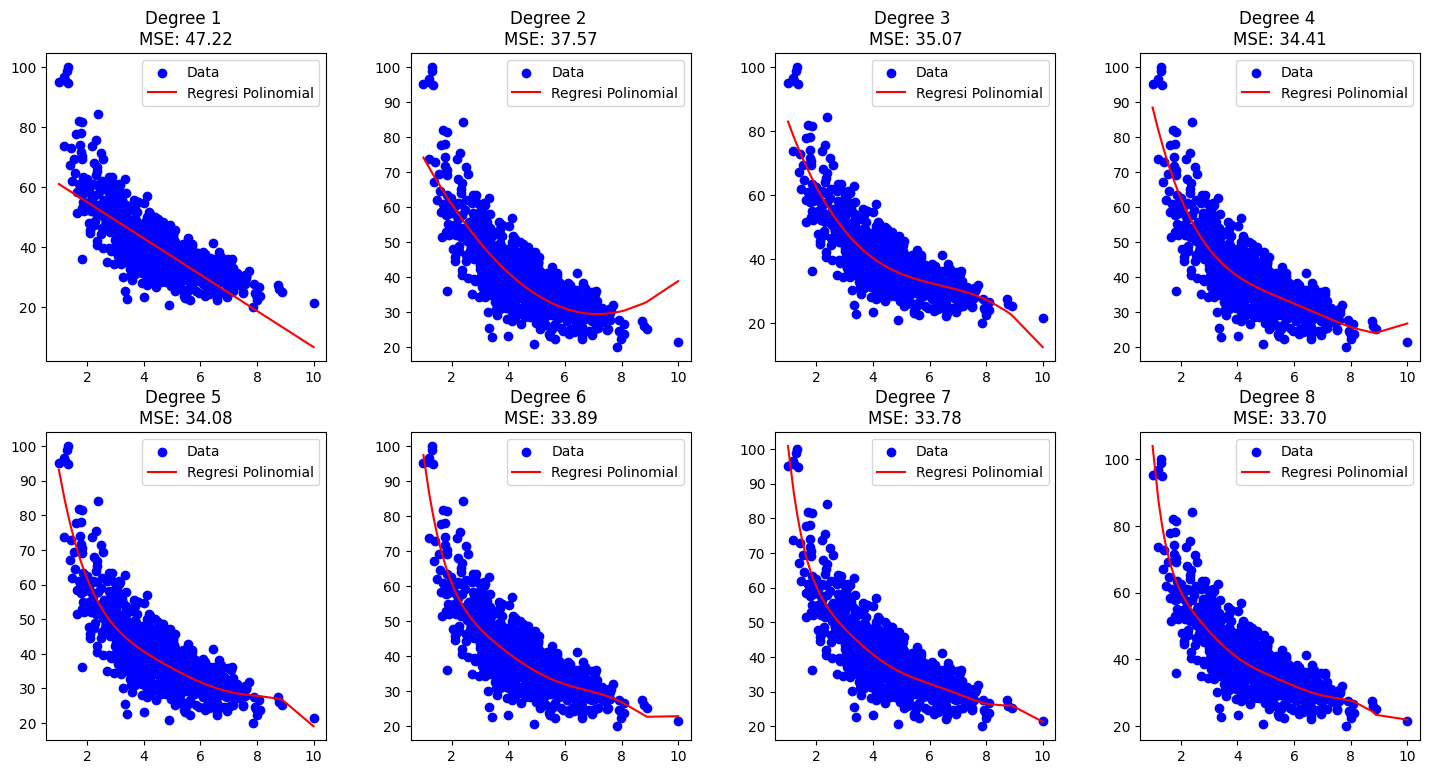

In [27]:
# Menginisialisasi array derajat polinomial yang akan diuji
degrees = [1, 2, 3, 4, 5, 6, 7, 8]
# Membagi
fig, axes = plt.subplots(2,4, figsize = (15,8))
fig.tight_layout(pad=3.0)
# Menginisialisasi variabel untuk menyimpan nilai-nilai MSE
mse_values = []
for i, degree in enumerate(degrees):
  # Membuat objek PolynomialFeatures dengan derajat tertentu
  polynomial_features = PolynomialFeatures(degree=degree)
  # Mengubah fitur independen 'x' menjadi bentuk polinomial
  x_poly = polynomial_features.fit_transform(x.values.reshape(-1, 1))
  # Melatih model regresi linier pada fitur polinomial
  model = LinearRegression()
  model. fit(x_poly, y)
  # Memprediksi hasil
  y_pred = model.predict(x_poly)
  # Menghitung MSE (Mean Squared Error)
  mse = mean_squared_error(y, y_pred)
  mse_values. append (mse)
  # Plot hasil regresi polinomial
  ax = axes[i // 4, i % 4]
  ax.scatter(x, y, label= 'Data',color= 'blue')
  ax.plot(x, y_pred, color='red', label='Regresi Polinomial')
  ax.set_title(f'Degree {degree} \nMSE: {mse:.2f}')
  ax.legend()
  # Menampilkan plot
plt.show()